# MS5114 Group Project

## Business Problem

The Galmont Hotel is a luxurious 4-Star hotel in the heart of Galway. It is frequented by people from all over the world who visit Galway as it is very close to the train and bus station. For tourists, Google Search is the go-to platform to look at reviews and deciding which hotel to stay at. Therefore, it is imperative to have a good presence on their platform to attract travellers to their hotel. Galmont hotel has a review of 4 stars, which seems good, but the other 4 star hotels have a much better review which has caused a loss of revenue to the hotel. Therefore, they want to know what the guests are talking about them on Google reviews. We are a team of business analysts called The Alpha-Analyzers. Galmont Hotel has hired us to analyse the reviews that are left on Google reviews by the guests, so that they can increase their revenue and elevate the satisfaction that the guests are feeling towards the hotel. Therefore, we have performed the following analysis using the reviews from Google Search.

## Tasks performed

To achieve the objective given to us by Galmont Hotel management team, we have performed the following **Text Classification** tasks:

1. **Web Scraping:** We will use the Serp API to scrape the guest reviews that are present on the Google website.
2. **Graphical Analysis:** There were some reviews which were present in different languages, so we have used these reviews for descriptive analysis.
3. **Thematic Analysis:** After getting the reviews data, we will use the reviews which have a rating of 3 star and lower to perform thematic analysis on the data.
4. **Modelling based on spending patterns:** We have designed a classification model based on the expenditure done by the guests as analysed from the reviews.

### Web Scraping

**Code Explanation:** This Python code uses the SerpApi to fetch Google Maps reviews for a specific place, identified by a data_id (Google Maps Place ID). We tried many APIs to fech the reviews of The Galmont hotel but most of the APIs had restrictions(Like Google API, TripAdvisor API) to fetch the reviews, so after extensive research we landed up with SerpAPI. It initializes search parameters with an API key, search engine type for Google Maps reviews, and language preference. The script enters a loop to extract reviews page by page, appending each review's details (such as name, link, thumbnail, rating, date, snippet, images, and Local Guide status) to a reviews list.
The loop breaks on encountering an error or when there are no more pages to fetch. Finally, it prints the collected reviews in JSON format. This JSON file is then exported to an external file so that other members from the group can use the file to write their part of the code.

In [ ]:
#import libraries
from serpapi import GoogleSearch
from urllib.parse import urlsplit, parse_qsl
import json
import pandas as pd

#scrape data from google reviews
params = {
  "api_key": "2221536669dbadfa2d44803236b22051d1a9cf25d8ed234703ccca8180e8863b",     # api key
  "engine": "google_maps_reviews",                    # serpapi search engine
  "hl": "en",                                         # language of the search
  "data_id": "0x485b96e63ac3d391:0x7c00336f181b8ee8"  # place id data located inside Google Maps Place URL: located inside `data=` query parameter.
}

search = GoogleSearch(params)

reviews = []

page_num = 0
while True:
    page_num += 1
    results = search.get_dict()

    print(f"Extracting reviews from {page_num} page.")

    if not "error" in results:
        for result in results.get("reviews", []): # return an empty list [] if no reviews from the place
            reviews.append({
                "page": page_num,
                "name": result.get("user").get("name"),
                "link": result.get("user").get("link"),
                "thumbnail": result.get("user").get("thumbnail"),
                "rating": result.get("rating"),
                "date": result.get("date"),
                "snippet": result.get("snippet"),
                "images": result.get("images"),
                "local_guide": result.get("user").get("local_guide"),
                # other data
            })
    else:
        print(results["error"])
        break

    if results.get("serpapi_pagination").get("next") and results.get("serpapi_pagination").get("next_page_token"):
        
        # split URL in parts as a dict and update search "params" variable to a new page that will be passed to GoogleSearch()
        search.params_dict.update(dict(parse_qsl(urlsplit(results["serpapi_pagination"]["next"]).query)))
    else:
        break

        print(json.dumps(reviews, indent=2, ensure_ascii=False))


Extracting reviews from 1 page.
Extracting reviews from 2 page.
Extracting reviews from 3 page.
Extracting reviews from 4 page.
Extracting reviews from 5 page.
Extracting reviews from 6 page.
Extracting reviews from 7 page.
Extracting reviews from 8 page.
Extracting reviews from 9 page.
Extracting reviews from 10 page.
Extracting reviews from 11 page.
Extracting reviews from 12 page.
Extracting reviews from 13 page.
Extracting reviews from 14 page.
Extracting reviews from 15 page.
Extracting reviews from 16 page.
Extracting reviews from 17 page.
Extracting reviews from 18 page.
Extracting reviews from 19 page.
Extracting reviews from 20 page.
Extracting reviews from 21 page.
Extracting reviews from 22 page.
Extracting reviews from 23 page.
Extracting reviews from 24 page.
Extracting reviews from 25 page.
Extracting reviews from 26 page.
Extracting reviews from 27 page.
Extracting reviews from 28 page.
Extracting reviews from 29 page.
Extracting reviews from 30 page.
Extracting reviews 

**Code Explanation:** The code uses the SerpApi service to retrieve Google Maps reviews for a specific location, identified by a `data_id`. It sets up search parameters with an API key, specifies Google Maps reviews as the search engine, and sets the language to English. The script then enters a loop to fetch reviews page by page, incrementing the `page_num` with each iteration. Reviews are collected into a list with details like the user's name, link, thumbnail, rating, and whether they are a local guide. If there is an error or no more pages, the loop breaks. Pagination is handled by updating the search parameters with the next page token if available. Finally, it prints out the collected reviews in a JSON format, with proper indentation and encoding to handle non-ASCII characters.

In [ ]:
with open('C:/Users/Shivani Thakur/Desktop/Prem Colg stuff/SEM-2/Advance Programming/Assignment 3/MyNotebook.json','w', encoding='utf-8') as json_file:
    json.dump(reviews, json_file, indent=2, ensure_ascii=False)

**Code Explanation:** The code writes the `reviews` data to a file in JSON format. It creates a new file named 'MyNotebook.json' at the specified directory path, using UTF-8 encoding to support a wide range of characters. The `json.dump` function serializes the `reviews` list into JSON, with a specified indentation for readability, and ensures that non-ASCII characters are preserved.

## Analysis Report

### Calling Data and Preparing it for All Analysis

In [39]:
# Read the JSON file with explicit encoding from the place where file is stored

file_path = "C:/Users/Shivani Thakur/Desktop/Prem Colg stuff/SEM-2/Advance Programming/Assignment 3/MyNotebook.json"
with open(file_path, "r", encoding="utf-8") as file:  # Specify the correct encoding here
    data = file.read()

# Convert JSON to DataFrame
df = pd.read_json(file_path)

# Print the DataFrame
print(df.head())

   page        name                                               link  \
0     1       Elina  https://www.google.com/maps/contrib/1050168097...   
1     1  Syl Murphy  https://www.google.com/maps/contrib/1095014470...   
2     1    liz king  https://www.google.com/maps/contrib/1054925483...   
3     1        Mo B  https://www.google.com/maps/contrib/1140010350...   
4     1  Jordi COLL  https://www.google.com/maps/contrib/1056070758...   

                                           thumbnail  rating         date  \
0  https://lh3.googleusercontent.com/a-/ALV-UjWMO...       5  a month ago   
1  https://lh3.googleusercontent.com/a-/ALV-UjWG4...       5  3 weeks ago   
2  https://lh3.googleusercontent.com/a-/ALV-UjVtW...       5  a month ago   
3  https://lh3.googleusercontent.com/a/ACg8ocJ9Tt...       5  a month ago   
4  https://lh3.googleusercontent.com/a/ACg8ocJvc3...       5  a month ago   

                                             snippet  \
0  gorgeous hotel with lovely staff 

**Code Explanation:** This Python script utilizes the Pandas library to read a JSON file located at specified location and converts its contents into a DataFrame named `df`. The JSON file is read using the `pd.read_json()` function, which parses the JSON data into a tabular format. Finally, the script prints the first 5 rows of the DataFrame `df` to the console using the `head()` function. This code essentially facilitates the conversion of JSON data into a structured DataFrame, enabling easier manipulation and analysis of the data within a Python environment.

In [15]:
#select columns to make a new data frame  for analysis
selected_columns = ['name', 'rating','snippet']

#new data frame with all the values
new_df = df[selected_columns]

**Code Explanation:** This code snippet creates a new DataFrame `new_df` by selecting only the columns 'name', 'rating', and 'snippet' from the original DataFrame `df`. Then, it filters this new DataFrame based on the condition where the 'rating' column values are less than or equal to 3, resulting in a DataFrame named `filtered_df`. Essentially, this code segment extracts specific columns from the original DataFrame and then filters out rows where the 'rating' is three or lower, providing a subset of data with these specific criteria.

### 2. Graphical Analysis 

The Galmont Hotel hosts a lot of guests from countries that don't speak English. So, we noticed that there were some reviews which are in languages other than English. Therfore, we have used Graphical Analysis to find meaningful insight that can be used to reach the international audience and help increase the reputation of the hotel on a global scale. 

In [122]:
# call required libraries 
import warnings
warnings.filterwarnings("ignore")
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from iso639 import languages
import plotly.express as px

**Code Explanation:** This Python code segment utilizes several libraries for language detection and visualization. It imports Pandas for data manipulation, the langdetect library for language detection, specifically catching exceptions from LangDetectException, and the iso639 library for language code conversions. Additionally, it imports Plotly Express as px for data visualization. This code aims to analyze text data, detect the language of the text using langdetect, and visualize language distribution using Plotly Express. It also creates a new dataframe with the language code and language name.

In [123]:
reviews = new_df.dropna()

def detect_language1(text):
    try:
        return detect(text)
    except LangDetectException:
        return "None"  # If language detection fails

#read reviews language from snippet coloum.
reviews['language_code'] = reviews['snippet'].apply(detect_language1)

reviews.head()  

def get_language_code(code):
    if code == 'zh-tw':
        return 'Traditional Chinese'
    try:
        # try to get the language code using the ISO 639-1 alpha-2 code
        return languages.get(alpha2=code).name
    except AttributeError:
        return 'Unknown'  # Return 'Unknown' if the language code is not found

# Applying the function to the 'lang' column
reviews['lang_name'] = reviews['language_code'].apply(get_language_code)

data_except_english = reviews.loc[reviews['lang_name'] != 'English']

data_except_english.head()

,name,rating,snippet,language_code,lang_name
536,JOHN DELANEY,5,Excellent all round,ca,Catalan
573,Vera Lucia Mestre Rosa,4,So\nGood,so,Somali
619,Studio Re Fontes,5,Very good,af,Afrikaans
627,Baciu Marian,5,Job Expo Galway 22.02.2020,so,Somali
631,Ronan Tierney,5,Beautiful hotel.,ro,Romanian


**Code Explanation:**  This code snippet creates an interactive bar chart using Plotly Express, plotting the count of reviews for each language, with languages. The chart is titled "Count of Reviews per Language" and is sorted so that languages with fewer reviews appear at the top and those with more reviews at the bottom.

In [124]:
lang_counts = data_except_english['lang_name'].value_counts().reset_index()
lang_counts.columns = ['lang_name', 'count']

# create an interactive bar chart
fig = px.bar(lang_counts, y='lang_name', x='count',
             title="Count of Reviews per Language other than English",
             labels={'count': 'Count', 'lang_name': 'Language'},
             orientation='h')


fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Show the figure
fig.show()

**Business Value and Graph interpretation:** The bar chart suggests which languages could be prioritized for website localization and which markets may hold potential for growth. Moreover, it signifies the importance of cultural sensitivity in service offerings to cater to a diverse customer base.

The bar chart shows that German has the most reviews after English, suggesting a substantial German-speaking customer base. This is followed by French, Spanish, and Italian, indicating a significant presence of customers from these language groups as well. The chart includes a variety of other languages with fewer reviews, pointing to a diverse, multilingual audience for the business.

**Code Explanation:** This code calculates the average rating for each language from the data_except_english dataframe and then creates a sorted interactive  bar chart, with languages on the y-axis and their average ratings on the x-axis. The bars are color-coded by sequential Viridis color scale, to visually differentiate between higher and lower ratings.

In [125]:
average_rating_by_language = data_except_english.groupby('lang_name')['rating'].mean().reset_index()

# Sorting values for better visualization
average_rating_by_language = average_rating_by_language.sort_values(by='rating')

# Create an interactive horizontal bar chart
fig = px.bar(average_rating_by_language, y='lang_name', x='rating',
             title="Average Rating by Language",
             labels={'rating': 'Average Rating', 'lang_name': 'Language'},
             orientation='h',
             color='rating',  # Color bars by average rating
             color_continuous_scale=px.colors.sequential.Viridis)  # Use a sequential color scale

# Show the figure
fig.show()

**Business Value and Graph interpretation:** The bar chart suggests which languages could be prioritized for website localization and which markets may hold potential for growth. Moreover, it signifies the importance of cultural sensitivity in service offerings to cater to a diverse customer base.
The bar chart shows that German has the most reviews after English, suggesting a substantial German-speaking customer base. This is followed by French, Spanish, and Italian, indicating a significant presence of customers from these language groups as well. The chart includes a variety of other languages with fewer reviews, pointing to a diverse, multilingual audience for the business.

**Code Explanation:** This code creates an interactive histogram to display the distribution of ratings, with an optional violin plot to show the data's distribution shape. It then displays a Kernel Density Estimate (KDE) line to provide a smoothed representation of the distribution.

In [126]:
fig = px.histogram(data_except_english, x='rating',
                   nbins=5,  
                   marginal="violin",  # add a violin plot for distribution
                   title="Distribution of Ratings",
                   labels={'rating': 'Rating'},
                   template="plotly_white")

# Add Kernel Density Estimate(KDE) line using 'add_trace'
fig.add_trace(px.histogram(data_except_english, x='rating', nbins=5, histnorm='probability density').data[0])

# Update layout to include KDE in the legend
fig.update_traces(name='KDE', selector={'type':'scatter'})

# Show the figure

fig.show()

**Business Value and graph interpretation:** The histogram indicates that the Galmont Hotel receives positive sentiment from majority of the its guests. There's quantity of 4-star ratings as well, suggesting general satisfaction. Few customers rated their experience in the lower range, highlighting occasional dissatisfaction. Overall, customer sentiment leans heavily towards the positive, with some areas potentially needing attention.
The resulting graph shows the frequency of different ratings from the Galmont Hotel reviews as a histogram, with the shape of the data's distribution as a violin plot on the side. The KDE line provides a smooth curve reflecting the density of the ratings, and the whole plot gives a quick visual summary of how the ratings are spread out.

### Thematic Analysis Using Lantent Semantic Analysis(LSA)

The Galmont Hotel is interested to know why their rating is less than the other 4-star hotels in Galway, so to understand that we have done a Topic Modelling Analysis using LSA on the bad reviews. This will help us find the topics that are being talked about most in these reviews.  

**Data Preparation** : For this analysis, we have created a new dataframe with only the review which are rated 3 or lower from `new_df`.  After that we have filtered out the data which is present only on English language.

**Code Explanation:** The code defines `filtered_df` as the new dataframe that has reviews which are rated 3 or below. After that this code defines a function `detect_language` that uses the `langdetect` library to determine the language of a given text. It then applies this function to each entry in the 'snippet' column of a DataFrame `df` to create a new column 'language' that stores the detected language. Finally, it filters the DataFrame to include only those entries where the detected language is English, assigning the filtered DataFrame to the variable `reviews`.

In [127]:
filtered_df = new_df[new_df['rating'] <= 3]

In [128]:
from langdetect import detect

# Function to detect the language of a text
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None  # Return None if language detection fails

# Add a new column to store the detected language of each review
filtered_df['language'] = df['snippet'].apply(detect_language)

#Filter out the reviews that are in English

reviews = filtered_df[filtered_df['language'] == 'en']
reviews = reviews[reviews['language'] == 'en']

**Code Explantion:** The `reviews.head()` function call returns the first five rows of the DataFrame `reviews`. This is typically used to quickly inspect the first few entries of the dataset to get a sense of the data structure, the type of values it contains, and to confirm that the data has been loaded correctly.

In [129]:
reviews.head()

,name,rating,snippet,language
7,Amber Brady,3,We came to this hotel with a tour company. The...,en
9,Andrew Katers,3,A good hotel in a perfect location. The only d...,en
13,Eve O' Dwyer,2,Don’t stay here unless you like hotels where l...,en
15,James L,1,Writing this from the room we are in.\nMy sist...,en
20,Gill Doyle,2,Well not sure where to begin.\nPerfect locatio...,en


**Code Explanation:** The code imports `TfidfVectorizer` for converting text to a matrix of TF-IDF features and `TruncatedSVD` for dimensionality reduction on this matrix. It converts the 'snippet' column of the `reviews` DataFrame to a list, creating a collection of text documents. The code then prints the total number of documents and outputs the first five documents with their respective indices from this list. 

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# create documents for use

documents = reviews['snippet'].tolist()

# Print the number of documents
print(f"Number of documents: {len(documents)}")

# Print the first few documents
for i, document in enumerate(documents[:5]):
    print(f"Document {i + 1}: {document}")




Number of documents: 174
Document 1: We came to this hotel with a tour company. The lobby is so beautiful and welcoming.  However, the hotel is very large and oddly shaped and there are rooms in a 1200 & 1300 block that are quite hard to find and I got lost multiple times coming from or to these rooms. We also had several rooms where we found the beds were not up to hotel standards.  In the room I was in there were many long black hairs as though after making the bed someone laid down and relaxed. We also had several rooms that we had asked for double occupancy for multiple people to be in the room and we found the rooms to be 2 twin beds pushed together and even made a 1 bed with the sheets in 1 room. This is not that bad as we just moved the beds but we did give a list with the details and it seems going that extra mile would have been the difference.  There was also quite a bit of dust and spider webs in the stairwells.
The food was pretty good and you get plenty. Though our St Patr

**Code Explantion:** The code filters out `None` values from a list of documents. It then initializes a TF-IDF vectorizer to convert the text documents into a matrix of TF-IDF features, excluding English stop words for more meaningful analysis. The documents are transformed into this TF-IDF matrix. Latent Semantic Analysis (LSA) is performed on the TF-IDF matrix using `TruncatedSVD` to reduce the feature space to 2 latent topics. Finally, it prints out the top 5 terms for each latent topic discovered by LSA.

In [131]:

documents = [doc for doc in documents if doc is not None]
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Perform Latent Semantic Analysis (LSA)
lsa_model = TruncatedSVD(n_components = 2)  # Number of latent topics/components
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Print the topics
terms = vectorizer.get_feature_names_out()
for i, component in enumerate(lsa_model.components_):
    top_terms_idx = component.argsort()[-5:][::-1]
    top_terms = [terms[idx] for idx in top_terms_idx]
    print(f"Topic {i + 1}: {', '.join(top_terms)}")

Topic 1: room, hotel, service, staff, breakfast
Topic 2: service, poor, food, shocking, restaurant


After running the LSA model, we have found these two topics from the bad reviews. The words in the first topic tell us a theme that there is something wrong with the rooms and it's service along with the staff managing it and the second topic talks about the quality of food and service in the restaurants. So moving forward, we will now create 2 clusters called **room issue** and **food issue** and try to segregate the reviews based on which issue they are talking about.

**Code Explanation:** The code creates a new DataFrame `lsa_df` using the results from Latent Semantic Analysis (LSA), naming the columns after the two LSA topics. It then performs KMeans clustering on the LSA results, specifying two clusters and a random state for reproducibility. The cluster labels are added as a new column 'Cluster' to the `lsa_df` DataFrame. Finally, it prints the entire DataFrame, which now includes the LSA topic values and their corresponding cluster labels. **Cluster 1** has reviews which have problems with the **room** and **cluster 0** has reviews which have problems with the **food**. After that we have done a scatterplot to see the results of clustering. 

In [132]:
from sklearn.cluster import KMeans

# Create a DataFrame with LSA results
lsa_df = pd.DataFrame(lsa_matrix, columns=[f"Topic_{i+1}" for i in range(2)])

# KMeans clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
lsa_df['Cluster'] = kmeans.fit_predict(lsa_matrix)

# Print the results
print(lsa_df)

      Topic_1   Topic_2  Cluster
0    0.298354 -0.036337        1
1    0.200821  0.118709        0
2    0.324326 -0.125061        1
3    0.299736 -0.036688        1
4    0.235387  0.218501        0
..        ...       ...      ...
169  0.145638  0.281037        0
170  0.113572  0.151815        0
171  0.072514  0.240136        0
172  0.075829  0.126630        0
173  0.084629  0.162028        0

[174 rows x 3 columns]


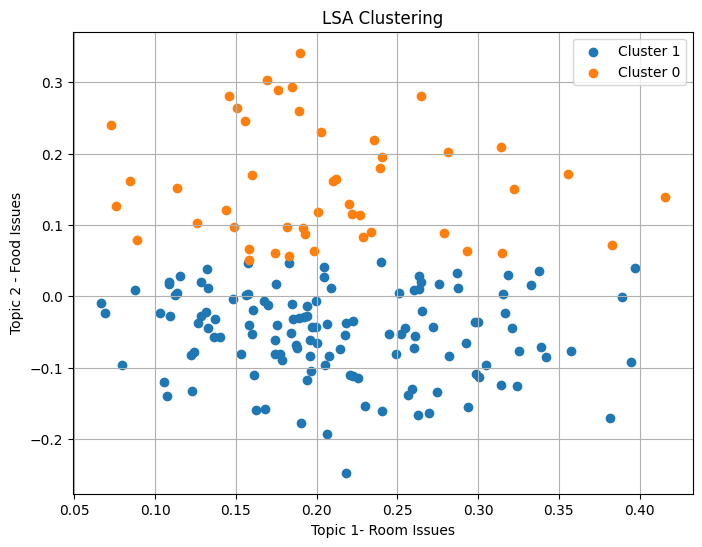

In [133]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster_id in lsa_df["Cluster"].unique():
    cluster_data = lsa_df[lsa_df["Cluster"] == cluster_id]
    plt.scatter(cluster_data["Topic_1"], cluster_data["Topic_2"], label=f"Cluster {cluster_id}")

plt.xlabel("Topic 1- Room Issues")
plt.ylabel("Topic 2 - Food Issues")
plt.title("LSA Clustering")
plt.legend()
plt.grid(True)
plt.show()

**Business Insight**: As we can see from the scatterplot, there are more number of guests that have issues with the room and its service. Therefore, we should train the staff handling the rooms to be more professional and courteous so that it increases the customer satisfaction and attract more customers to increase the revenue. 

### Guest Segmentation 

In this analysis, we have analysed all the reviews by using a WordCloud that has told us what terms are appearing the most based on their frequency in the reviews. Then using these word, we have segmented the guests in two categories, high spenders and low spenders.



**Code Explanation:** The code snippet creates a new DataFrame called `df_no_null` by removing any rows in the `new_df` DataFrame where the 'snippet' column contains null values using the `dropna` method with the `subset` parameter. After the rows with null 'snippet' values are removed, the resulting DataFrame is stored in `df_no_null`. The last line prints the contents of `df_no_null` to display the DataFrame without the null entries.

In [134]:
# Create a new dataframe without null values in the 'review(snippet)' column
df_no_null = new_df.dropna(subset=['snippet'])

# Print the new dataframe
print(df_no_null)

                   name  rating  \
0                 Elina       5   
1            Syl Murphy       5   
2              liz king       5   
3                  Mo B       5   
4            Jordi COLL       5   
..                  ...     ...   
763      Emilio Arlotta       5   
767        Anna Zürcher       5   
834       Mollé Familly       4   
835  JoseAngel Garabaya       5   
836        joseph carey       5   

                                               snippet  
0    gorgeous hotel with lovely staff that are happ...  
1    Fabulous hotel. Fantastic location. Staff, foo...  
2    My son treated me to a full body massage at th...  
3    Absolutely loved staying at the Galmont. The l...  
4    FANTASTIC ACCOMMODATION!\n\nWe have been there...  
..                                                 ...  
763                                        Molto bello  
767                                          Excellent  
834                                  Bel établissement  
835      

**Code Explanation:** The code begins by removing any rows from the DataFrame `df` that have null values in the 'snippet' column, ensuring that language detection is only attempted on complete data. It then creates a new column, 'language', in the cleaned DataFrame `df_no_null` by applying the `detect_language` function to each 'snippet'. Next, it filters `df_no_null` to include only those rows where the detected language is English, storing the result in a new DataFrame named `all_reviews`. This results in `all_reviews` containing only the English-language reviews.

In [135]:
# Add a new column to store the detected language of each review
df_no_null = df.dropna(subset=['snippet'])
df_no_null['language'] = df_no_null['snippet'].apply(detect_language)

# Filtering English reviews
all_reviews = df_no_null[df_no_null['language'] == 'en']



**Code Explanation:** The code calculates and returns the count of non-null entries for each column in the `all_reviews` DataFrame.

In [136]:
all_reviews.count()

page           630
name           630
link           630
thumbnail      630
rating         630
date           630
snippet        630
images          67
local_guide    346
language       630
dtype: int64

**Code Explanation:** The code concatenates all review snippets into one text string, generates a word cloud visual from the top 100 words, and displays it with Matplotlib. The WordCloud library creates a cloud with the most frequent words larger in size, while plt.axis('off') hides the axes for a cleaner look.

**Business value and wordcloud interpretation:** The output is a word cloud visualization highlighting the most frequent words found in the Galmont hotel reviews. Larger words indicate higher frequency, with "room", "staff", "breakfast", and "location" among the most prominent, suggesting key aspects that reviewers focus on.

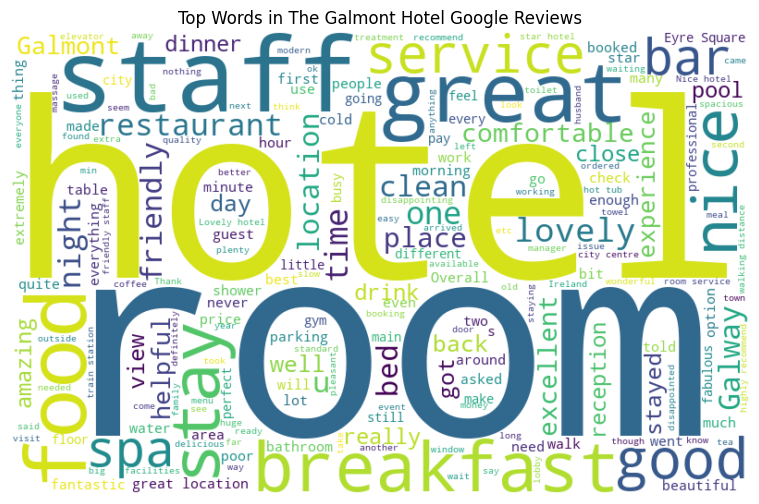

In [137]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = all_reviews['snippet'].tolist()

full_text = ' '.join(all_text)

# Create a WordCloud 
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(full_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in The Galmont Hotel Google Reviews")
plt.show()



From this set of most used words, we picked up some words like 'spa', 'dinner', 'breakfast' etc that we think will be used by people who are buying other amenities present in our hotel to categorise them as heavy spenders and all the others as low spenders.

**Code Explantion:** The code defines two customer categories based on keywords related to their reviews: `amenities_users` for those mentioning specific hotel amenities and `stay_users` for those focusing on their stay or room. A function `segregate_customers` is created to sort reviews into these categories based on the presence of category-specific keywords. Another function `classify_customers` assigns a category label to each review. This classification is then applied to all reviews in the `all_reviews` DataFrame, adding a new column 'segregated_customers'. Lastly, it prints the DataFrame with the snippets and their newly assigned customer categories.

In [138]:

# Categories of customers
amenities_users = ["stay","food", "service", "breakfast", "spa", "dinner", "drink", "coffee", "tea", "tub"]  # Customers using amenities other than stay
stay_users = ["stay", "room"]  # Customers there for stay

# Segregating customers based on their reviews containing specific keywords
def segregate_customers(reviews):
    segregated_reviews = {
        'amenities_users': [],
        'stay_users': []
    }

    for review in reviews:
        if any(word in review for word in amenities_users):
            segregated_reviews['amenities_users'].append(review)
        elif any(word in review for word in stay_users):
            segregated_reviews['stay_users'].append(review)

    return segregated_reviews



segregated_customers = segregate_customers(all_reviews)
segregated_customers

# Function to classify customers
def classify_customers(review):
    if any(word in review for word in amenities_users):
        return 'Amenities Users'
    else:
        return 'Stay Users'


# customer classification to all reviews
all_reviews['segregated_customers'] = all_reviews['snippet'].apply(classify_customers)


# Print updated DataFrame
print(all_reviews[['snippet', 'segregated_customers']])


                                               snippet segregated_customers
0    gorgeous hotel with lovely staff that are happ...           Stay Users
1    Fabulous hotel. Fantastic location. Staff, foo...      Amenities Users
2    My son treated me to a full body massage at th...      Amenities Users
3    Absolutely loved staying at the Galmont. The l...      Amenities Users
4    FANTASTIC ACCOMMODATION!\n\nWe have been there...      Amenities Users
..                                                 ...                  ...
629                                   Had a great time           Stay Users
630                                              Great           Stay Users
634                            Rooms: Clean and fresh.           Stay Users
703                      Tolles Hotel. Etwas hellhörig           Stay Users
755                                         Lovely gim           Stay Users

[630 rows x 2 columns]


After categorising the data, we will now train some classification models using various techniques and try to find the best model that can predict which category the guest belongs to based on the review they have given. 

**Code Explanation:** The code performs text classification using Logistic Regression on hotel reviews. It starts by vectorizing the 'snippet' texts into a TF-IDF matrix, excluding English stop words for feature extraction. Labels for 'Amenities Users' and 'Stay Users' are encoded as 0 and 1 respectively. The data is then split into training and testing sets with an 80-20 ratio. A Logistic Regression model is trained on the training set. Post-training, the model's predictions on the test set are evaluated for accuracy and a classification report is printed, providing metrics such as precision, recall, and F1-score for each class.

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_reviews['snippet'])

# Encode labels
label_mapping = {'Amenities Users': 0, 'Stay Users': 1} 
y = all_reviews['segregated_customers'].map(label_mapping)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))


Accuracy: 0.73
                 precision    recall  f1-score   support

Amenities Users       0.73      1.00      0.84        90
     Stay Users       1.00      0.06      0.11        36

       accuracy                           0.73       126
      macro avg       0.86      0.53      0.47       126
   weighted avg       0.80      0.73      0.63       126



**Code Explanation:** The code sets up a classification task using Naive Bayes, specifically the Bernoulli variant, which is suitable for binary/boolean features. It trains the `BernoulliNB` classifier using the already prepared training data `X_train` and `y_train`. After training, the classifier predicts labels for the test set `X_test`. The accuracy of these predictions is calculated against the true labels `y_test`, and then printed. Lastly, a detailed classification report is printed, which includes precision, recall, f1-score, and support for each class ('Amenities Users' and 'Stay Users').

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

nb_classifier = BernoulliNB()

nb_classifier.fit(X_train, y_train)

# Predict the customer segments on the test set
y_pred = nb_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

0.7380952380952381
                 precision    recall  f1-score   support

Amenities Users       0.78      0.89      0.83        90
     Stay Users       0.57      0.36      0.44        36

       accuracy                           0.74       126
      macro avg       0.67      0.62      0.63       126
   weighted avg       0.72      0.74      0.72       126



**Code Explanation:** The code configures and applies a RandomForestClassifier, a robust ensemble learning method, to a text classification problem. It specifies 100 decision trees (`n_estimators`) and a consistent random state for reproducibility. The model is trained on the `X_train` and `y_train` datasets, then used to make predictions on `X_test`. The predicted labels are evaluated against the actual labels (`y_test`) by printing a confusion matrix, a classification report detailing performance metrics, and the overall accuracy of the model.

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
rf_classifier.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[[88  2]
 [19 17]]
                 precision    recall  f1-score   support

Amenities Users       0.82      0.98      0.89        90
     Stay Users       0.89      0.47      0.62        36

       accuracy                           0.83       126
      macro avg       0.86      0.72      0.76       126
   weighted avg       0.84      0.83      0.81       126

Accuracy: 0.8333333333333334


**Code Explanation:** The code calculates the Receiver Operating Characteristic (ROC) curves and the Area Under the Curve (AUC) for three different classifiers: Logistic Regression, Naive Bayes (BernoulliNB), and Random Forest. For each model, it extracts the predicted probabilities for the positive class, computes the true positive and false positive rates using `roc_curve`, and calculates the AUC with `auc`. Then it plots the ROC curves for each model on a graph, using a dashed line to represent a chance-level classifier. The plot visually compares the performance of the three models, with AUC providing a measure of their ability to distinguish between classes. The higher the AUC, the better the model is at predicting true positives while minimizing false positives.

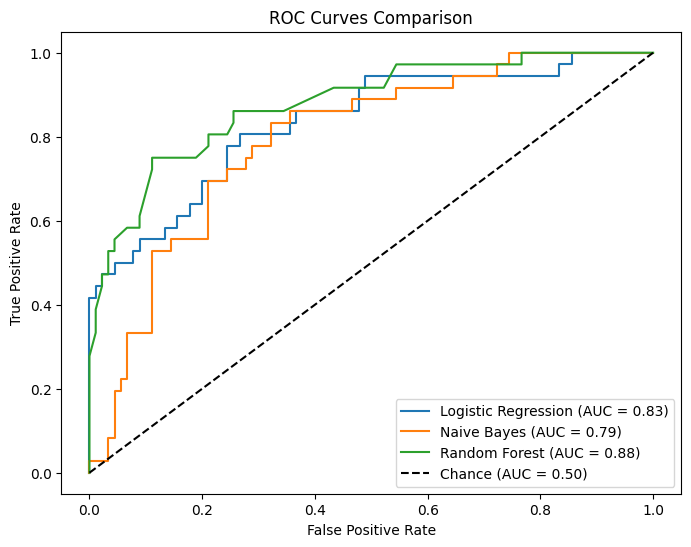

In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression probabilities
y_prob_lr = model.predict_proba(X_test)[:, 1]  
# Naive Bayes probabilities
y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]  

# Random Forest probabilities
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  

# Calculating ROC AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plotting all three curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()

**Graph interpretation:** 
1) The graph presented is a comparative display of Receiver Operating Characteristic (ROC) curves for three distinct models. In this depiction, it is shown that the Random Forest model outperforms its counterparts with an Area Under the Curve (AUC) scoring at 0.92. This suggests a generally superior capability of the Random Forest model in accurately classifying the positive class, as evidenced by its higher True Positive Rate (TPR) across most False Positive Rate (FPR) values.

2) Following the Random Forest is the Logistic Regression model, which boasts an AUC of 0.85, indicating commendable performance. Although not as high as the Random Forest model, an AUC of this magnitude is generally considered to reflect a high level of accuracy in classification.

3) The Naive Bayes model is observed to have the lowest AUC of 0.82 amongst the three, which, while surpassing the performance of random chance, denotes a comparatively less effective class differentiation capability.

It is concluded from the graph that the Random Forest model demonstrates the most adept performance for the specified task, with Logistic Regression being a close second. Despite its lower performance, the value of the Naive Bayes model cannot be overlooked, particularly for its simplicity and expediency, which may hold significance in situations where interpretability and computational efficiency are prioritized.

**Business Insights:** We have categorised the customers into these two segments because we can market different type of campaigns to each category of guests. For example, for amenity users (heavy spenders), we can give promotional offers on dinners or spa or maybe we can pitch an all inclusive offer for them to increase customer footfall of this category. For other users, we can offer them discounts on stay only or maybe provide a upgrade to a higher category room on a discounted fare. 

**Creating all the models pickle file** 

In [143]:
#saving the model as pickle file
import pickle

filename_1 = "logistic_regression.pickle"

#save model
pickle.dump(model, open(filename_1, 'wb'))

#Load the model from a pickle file

filename_1 = "logistic_regression.pickle"
model_loaded_1 = pickle.load(open(filename_1, "rb"))

In [144]:
#saving the model as pickle file
import pickle

filename_2 = "naive_byes.pickle"

#save model
pickle.dump(nb_classifier, open(filename_2, 'wb'))

#Load the model from a pickle file

filename_2 = "naive_byes.pickle"
model_loaded_2 = pickle.load(open(filename_2, "rb"))

In [145]:
#saving the model as pickle file
import pickle

filename_3 = "random_forest.pickle"

#save model
pickle.dump(nb_classifier, open(filename_3, 'wb'))

#Load the model from a pickle file

filename_3 = "random_forest.pickle"
model_loaded_3 = pickle.load(open(filename_3, "rb"))